#  House Price Prediction

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_rows',100)

# Read Dataset

In [ ]:
# A contaings training over which we have to create model
# B is testing dataset for which we have to find predictions
A = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
B = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [ ]:
A.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
B.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
A.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
B.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# Dataset Checking

In [ ]:
A.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
pd.DataFrame(A.skew(),columns=["Skew"]).sort_values(by="Skew")

,Skew
GarageYrBlt,-0.649415
YearBuilt,-0.613461
YearRemodAdd,-0.503562
GarageCars,-0.342549
Id,0.000000
FullBath,0.036562
YrSold,0.096269
GarageArea,0.179981
BedroomAbvGr,0.211790
MoSold,0.212053


In [ ]:
A.corr()[["SalePrice"]].sort_values(by="SalePrice")

,SalePrice
KitchenAbvGr,-0.135907
EnclosedPorch,-0.128578
MSSubClass,-0.084284
OverallCond,-0.077856
YrSold,-0.028923
LowQualFinSF,-0.025606
Id,-0.021917
MiscVal,-0.021190
BsmtHalfBath,-0.016844
BsmtFinSF2,-0.011378


# Missing data check in dataset A & B

In [ ]:
A.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
B.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Missing Data Treatment - 1

In [ ]:
# for some columns, Nan values doesnot need to replace by mode value of column
for i in ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
          "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]:
    A[i] = A[i].fillna("None")
    B[i] = B[i].fillna("None")

In [ ]:
print(A.isna().sum().sum(),"|",B.isna().sum().sum())

357 | 358


# Exploratory Data Analysis (EDA)

In [ ]:
print("=============================")
print(A.BsmtQual.value_counts())
print("=============================")
print(A.BsmtCond.value_counts())
print("=============================")
print(A.BsmtExposure.value_counts())
print("=============================")
print(A.BsmtFinType1.value_counts())
print("=============================")
print(A.BsmtFinType2.value_counts())
print("=============================")
print(A.FireplaceQu.value_counts())
print("=============================")

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64
TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64
Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64
Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64


Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64


<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

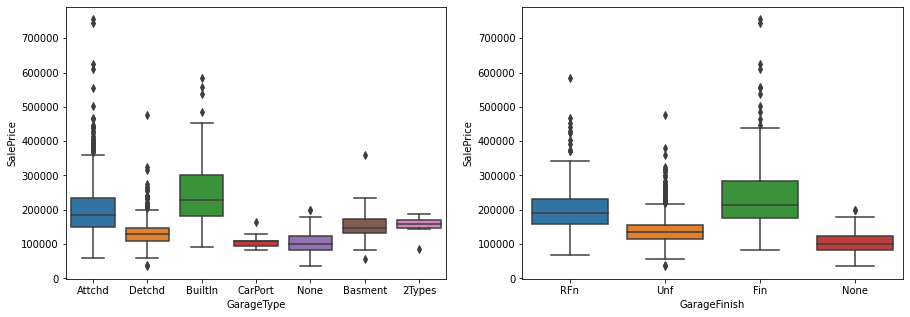

In [ ]:
print("=============================")
print(A.GarageType.value_counts())
print("=============================")
print(A.GarageFinish.value_counts())
print("=============================")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(A.GarageType,A.SalePrice)
plt.subplot(1,2,2)
sb.boxplot(A.GarageFinish,A.SalePrice)

In [ ]:
print("=============================")
print(A.GarageQual.value_counts())
print("=============================")
print(A.GarageCond.value_counts())
print("=============================")
#need to drop GarageQual column as GarageQual and GarageCond contains almost same data

TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: GarageQual, dtype: int64
TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64


In [ ]:
categorical = []
continuous = []

for i in A.columns:
    if A[i].dtypes == object:
        categorical.append(i)
    else:
        continuous.append(i)
        
continuous.remove("SalePrice")
continuous.remove("Id")

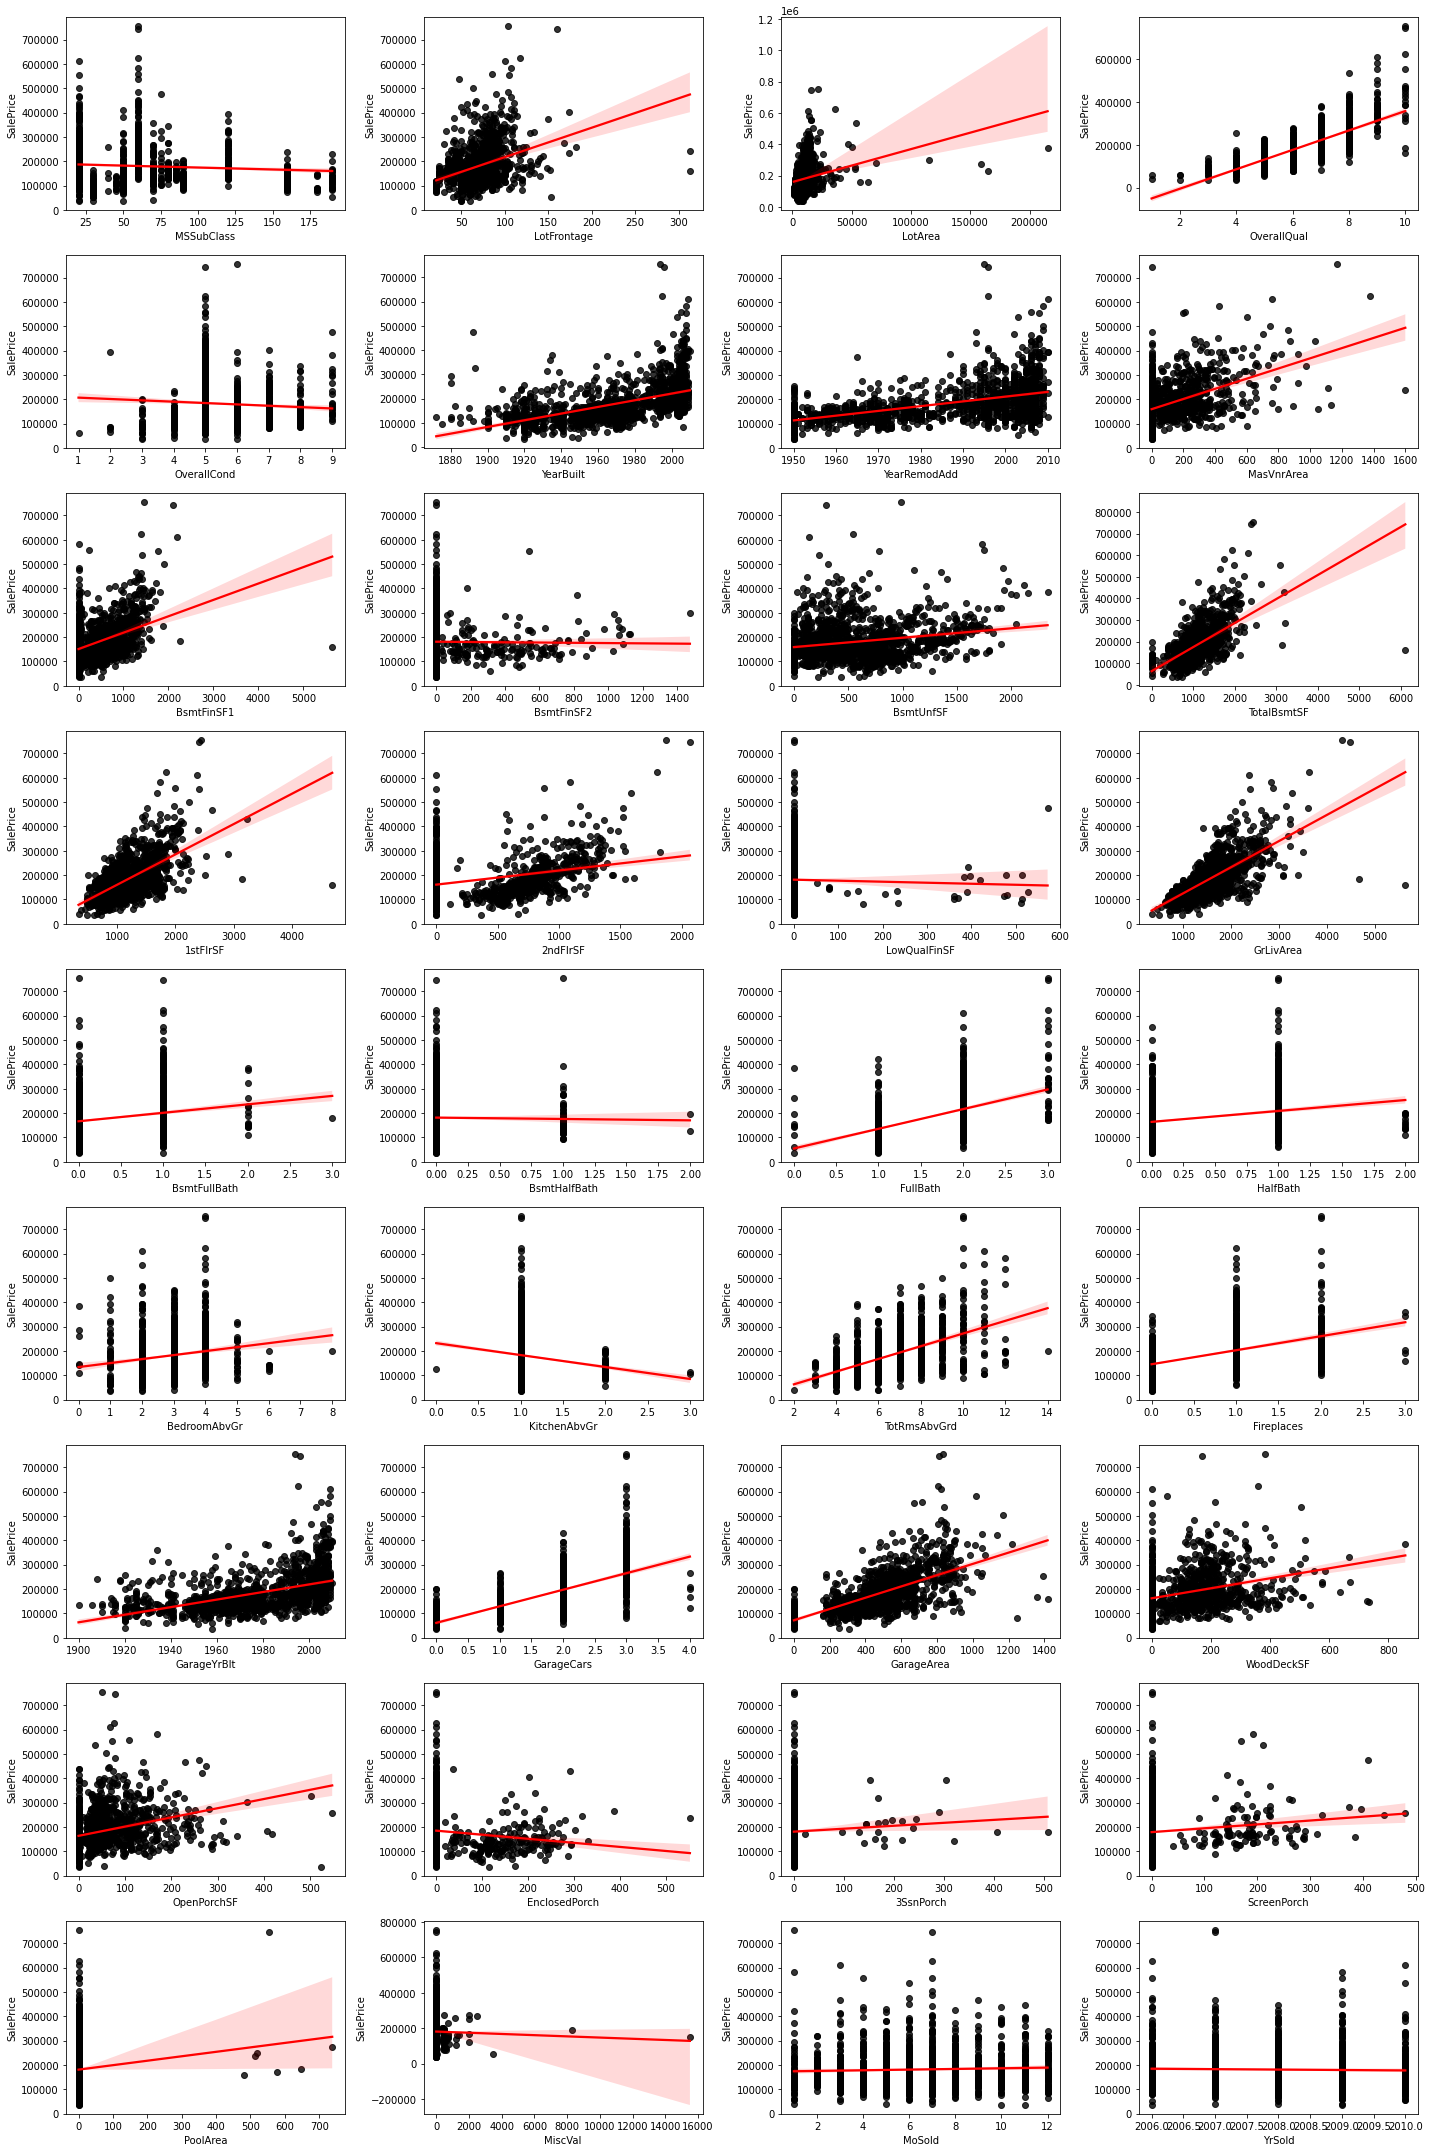

In [ ]:
plt.figure(figsize=(20,30))
x=1
for i in continuous:
    plt.subplot(9,4,x)
    sb.regplot(A[i],A.SalePrice,scatter_kws={"color": "black"}, line_kws={"color": "red"})
    x = x + 1
plt.tight_layout()
# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. This is an experimental feature
#  and may not work for some cases. It only checks the extents of ticklabels, axis labels, and titles.

In [ ]:
#need to drop YrSold & MoSold column as as it does not contain any statistical information

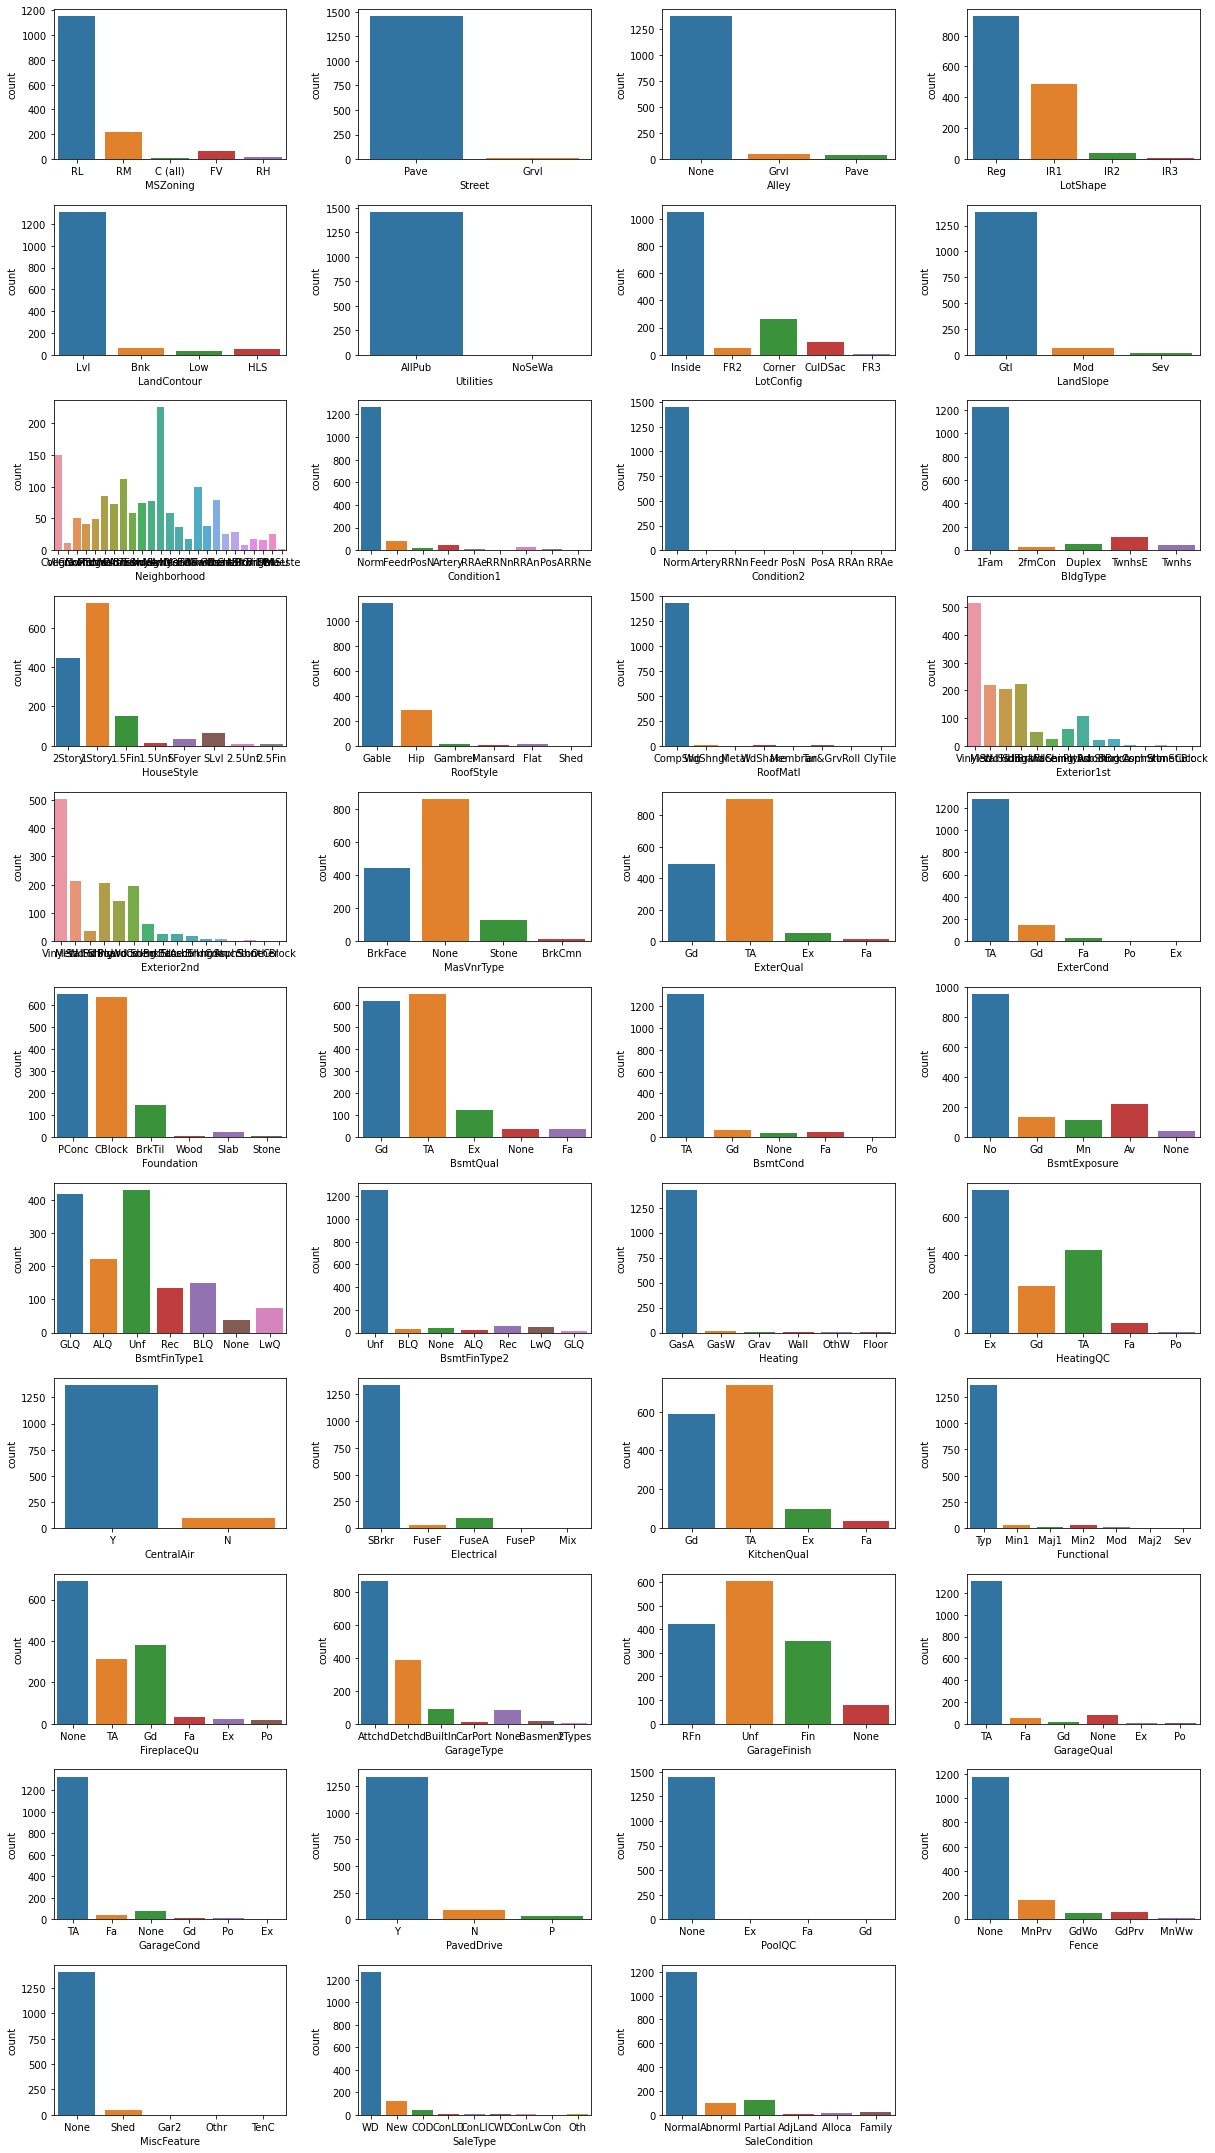

In [ ]:
plt.figure(figsize=(17,30))
x=1
for i in categorical:
    plt.subplot(11,4,x)
    sb.countplot(A[i])
    x = x + 1
    
plt.tight_layout()

In [ ]:
A = A.drop(columns=["GarageQual","MoSold","YrSold"],axis=1)
B = B.drop(columns=["GarageQual","MoSold","YrSold"],axis=1)

# Missing Data Treatment - 2

In [ ]:
for i in A.columns:
    if A[i].dtypes == "object":
        x1 = A[i].mode()[0]
        A[i] = A[i].fillna(x1)
    else:
        x1 = A[i].mean()
        A[i] = A[i].fillna(x1)
        
for i in B.columns:
    if B[i].dtypes == "object":
        x1 = B[i].mode()[0]
        B[i] = B[i].fillna(x1)
    else:
        x1 = B[i].mean()
        B[i] = B[i].fillna(x1)

NameError: ignored

In [ ]:
print(A.isna().sum().sum(),"|",B.isna().sum().sum())

# Define X and Y

In [ ]:
#X and Y has been defined using training data
#P has been defined using testing data
Y = A[["SalePrice"]]
X = A.drop(columns=["SalePrice","Id"],axis=1)
P = B.drop(columns=["Id"],axis=1)

In [ ]:
X.shape

(1460, 76)

In [ ]:
Y.shape

(1460, 1)

# One Hot Encoding

In [ ]:
#categorical and continuous column separation from X
cat1 = []
con1 = []
for i in X.columns:
    if X[i].dtypes == "object":
        cat1.append(i)
    else:
        con1.append(i)
        
#categorical and continuous column separation from P
cat2 = []
con2 = []
for i in P.columns:
    if P[i].dtypes == "object":
        cat2.append(i)
    else:
        con2.append(i)

In [ ]:
#One hot encoding for categorical columns in X
X2 = pd.DataFrame(pd.get_dummies(X[cat1]))
X2.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#One hot encoding of categorical column in P
P2 = pd.DataFrame(pd.get_dummies(P[cat2]))
P2.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
len(X2.columns)

260

In [ ]:
len(P2.columns)

243

In [ ]:
len(X2.columns)-len(P2.columns)
# There is differnce of 17 numbers of columns in P2 compared to X2 (260-243 = 17)
# So we have to match columns in P2

17

In [ ]:
# columns list which are missing in P2 after one hot encoding compared to X2
col_list = []
list1 = list(X2.columns)
list2 = list(P2.columns)

for i in list1:
    if i not in list2:
        col_list.append(i)

In [ ]:
len(col_list)

17

In [ ]:
# Adding and assigning 0 value to columns which are missing after one hot encoding in P
P2[col_list] = 0

In [ ]:
len(X2.columns)

260

In [ ]:
len(P2.columns)

260

In [ ]:
# Now columns are matched after one hot encoding
# now we will do preprocessing

# Pre-Precessing

In [ ]:
# Standardisation of continous column data in X
# Standardisation of continous column data in P using same variance and standard deviation
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con1]),columns=con1)
P1 = pd.DataFrame(ss.transform(P[con2]),columns=con2)

In [ ]:
#Joining of categorical features (after one hot encoding) with continuos features (after standardisation)
Xnew = X1.join(X2)
Pnew = P1.join(P2)

In [ ]:
#outliers needs to be removed from Xnew and Y which is further going to be used for model building
outliers = []
for i in Xnew.columns:
    outliers.extend(list(Xnew[(Xnew[i]>3) | (Xnew[i]<-3)].index))

In [ ]:
outliers = list(np.unique(outliers))
len(outliers)

439

In [ ]:
# removal of outlier
Xnew = Xnew.drop(index=outliers,axis=0)
Y = Y.drop(labels=outliers,axis=0)

In [ ]:
#Reindexing
Xnew.index = range(0,Xnew.shape[0])
Y.index = range(0,Y.shape[0])

In [ ]:
Xnew.shape

(1021, 294)

# Division of data in training and testing set

In [ ]:
# now standardiszation is done on training and testing data
# now we have to use standardised training data for building model(only Xnew and Y)
# standardised testing data will be used further for predictions after building above model(Pnew to be used)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Creation of backward elimination model

In [ ]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     52.79
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.84e-293
Time:                        09:45:59   Log-Likelihood:                -9033.6
No. Observations:                 816   AIC:                         1.848e+04
Df Residuals:                     610   BIC:                         1.945e+04
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass            -2116.0443   8295.902     -0.255      0.799   -1.84e+04    1.42e+04
LotFrontage            -240.1081   1346.958     -0.178      0.859   -2885.345    2405.129
LotArea                1.463e+04   3366.603      4.347      0.000    8023.226    2.12e+04
OverallQual            7279.3079   1660.884      4.383      0.000    4017.564    1.05e+04
OverallCond            6775.2394   1189.836      5.694      0.000    4438.567    9111.911
YearBuilt              1.237e+04   3173.993      3.897      0.000    6137.022    1.86e+04
YearRemodAdd           3010.9406   1433.429      2.101      0.036     195.886    5825.995
MasVnrArea             -501.6165   1745.854     -0.287      0.774   -3930.231    2926.998
BsmtFinSF1             7399.9300   1380.056      5.362      0.000    4689.693    1.01e+04
BsmtFinSF2             2953.6031   3161.605      0.934      0.351   -3255.348    9162.554
BsmtUnfSF               559.2437   1256.519      0.445      0.656   -1908.384    3026.872
TotalBsmtSF            9342.6683   2059.156      4.537      0.000    5298.773    1.34e+04
1stFlrSF               5656.5719   2141.486      2.641      0.008    1450.992    9862.152
2ndFlrSF               1.513e+04   2230.521      6.785      0.000    1.08e+04    1.95e+04
LowQualFinSF           -820.4860   6764.552     -0.121      0.903   -1.41e+04    1.25e+04
GrLivArea              1.666e+04   1689.011      9.862      0.000    1.33e+04       2e+04
BsmtFullBath            -70.2415   1190.413     -0.059      0.953   -2408.048    2267.564
BsmtHalfBath          -3714.9532    551.947     -6.731      0.000   -4798.900   -2631.007
FullBath                  4.8964   1561.060      0.003      0.997   -3060.808    3070.601
HalfBath                 79.7616   1293.676      0.062      0.951   -2460.838    2620.361
BedroomAbvGr          -1200.5707   1448.885     -0.829      0.408   -4045.979    1644.838
KitchenAbvGr          -3258.6774    484.156     -6.731      0.000   -4209.492   -2307.863
TotRmsAbvGrd            812.5316   1874.676      0.433      0.665   -2869.070    4494.133
Fireplaces              142.1833   2184.562      0.065      0.948   -4147.991    4432.357
GarageYrBlt           -1131.6794   1897.254     -0.596      0.551   -4857.622    2594.263
GarageCars             2988.8678   1969.634      1.517      0.130    -879.220    6856.955
GarageArea             4439.2831   1964.477      2.260      0.024     581.325    8297.241
WoodDeckSF             3892.8901    934.832      4.164      0.000    2057.011    5728.769
OpenPorchSF            2474.3913   1051.342      2.354      0.019     409.702    4539.081
EnclosedPorch           591.5706   1236.701      0.478      0.633   -1837.138    3020.279
3SsnPorch             -1.749e+04   2.53e+04     -0.691      0.490   -6.72e+04    3.22e+04
ScreenPorch            

In [ ]:
l1 = list(model.pvalues.sort_values().index)

In [ ]:
rsq_adj1 = round(model.rsquared_adj,4)
print(rsq_adj1)

0.9287


# Removal of unnecessary columns based on P value

In [ ]:
for i in range(len(l1)):
    col_to_drop = model.pvalues.sort_values().index[-1]
    print(col_to_drop,"=",i+1)
    Xnew = Xnew.drop(columns=col_to_drop,axis=1)
    
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=31)
    
    from statsmodels.api import add_constant,OLS
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    
    rsq_adj2 = round(model.rsquared_adj,4)
    
    if rsq_adj2 < rsq_adj1:
        break
    else:
        rsq_adj1 = rsq_adj2
        
print(rsq_adj2) 

MiscFeature_TenC = 1
MiscFeature_Othr = 2
MiscFeature_Gar2 = 3
PoolQC_Gd = 4
PoolQC_Fa = 5
PoolQC_Ex = 6
GarageType_2Types = 7
Functional_Sev = 8
Electrical_Mix = 9
Electrical_FuseP = 10
HeatingQC_Po = 11
Heating_OthW = 12
Heating_Floor = 13
FullBath = 14
Exterior1st_WdShing = 15
BsmtFinType2_Unf = 16
RoofStyle_Hip = 17
Condition2_RRAe = 18
Exterior2nd_Brk Cmn = 19
MSZoning_RH = 20
RoofStyle_Shed = 21
BldgType_Duplex = 22
Exterior1st_Stone = 23
Condition2_Artery = 24
RoofMatl_Roll = 25
Condition2_PosN = 26
HouseStyle_2.5Fin = 27
LandSlope_Gtl = 28
Exterior2nd_HdBoard = 29
BldgType_Twnhs = 30
BsmtFullBath = 31
Exterior1st_AsphShn = 32
ExterCond_Po = 33
Exterior2nd_AsphShn = 34
HalfBath = 35
Fireplaces = 36
Functional_Min1 = 37
Utilities_NoSeWa = 38
ExterCond_Ex = 39
Foundation_CBlock = 40
RoofMatl_ClyTile = 41
Condition2_RRNn = 42
MiscVal = 43
Exterior1st_CBlock = 44
Condition1_RRNe = 45
Exterior2nd_CBlock = 46
GarageCond_TA = 47
Foundation_Wood = 48
BsmtCond_Po = 49
Condition2_PosA = 5

In [ ]:
# Now Xnew contains 108 columns after removal of unncessary columns as per p values
294-177

117

In [ ]:
Xnew.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtHalfBath,...,Fence_MnPrv,Fence_None,MiscFeature_None,MiscFeature_Shed,SaleType_CWD,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
0,-0.207142,0.651479,-0.5172,1.050994,0.878668,0.575425,-0.459303,-0.793434,1.161852,-0.241061,...,0,1,1,0,0,0,0,0,1,0
1,0.073480,0.651479,-0.5172,0.984752,0.830215,0.092907,-0.313369,-0.627826,1.189351,-0.241061,...,0,1,1,0,0,0,0,0,1,0
2,0.375148,1.374795,-0.5172,0.951632,0.733308,0.463568,0.199680,-0.045611,1.617877,-0.241061,...,0,1,1,0,0,0,0,0,1,0
3,-0.043379,1.374795,-0.5172,1.084115,0.975575,2.029558,1.433276,1.374993,-0.795163,-0.241061,...,0,1,1,0,0,0,0,0,1,0
4,0.068469,-0.795151,-0.5172,-0.207594,-0.962566,1.014077,-0.039743,-0.317311,-0.795163,-0.241061,...,0,1,1,0,0,0,0,0,1,0


# Columns which are deleted from Xnew(as per pvalues), the same has to be removed from Pnew

In [ ]:
col_to_be_deleted = l1[-177:]